In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
from sklearn import datasets
dataset = datasets.load_iris()
x = pd.DataFrame(dataset.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(dataset.target)
y.columns = ['Targets']
x.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# normalize each variable to have mean=0 and sd=1
clusterdata=x.copy()
for i in range(clusterdata.shape[1]):
    clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i])

In [4]:
clusterdata.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# k-means cluster analysis for 1-10 clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

#Perform k-means analysis, as well as check the average within cluster distances vs. different k values
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    clusassign=model.predict(clusterdata)
    meandist.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1))
    / clusterdata.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

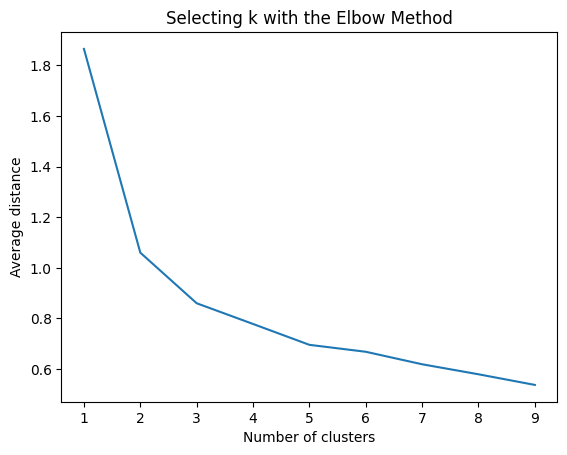

In [7]:
%matplotlib inline
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

In [8]:
# K Means Cluster choosing 3 as the number of clusters
model = KMeans(n_clusters=3)
model.fit(clusterdata)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Text(0.5, 1.0, 'K Means Clustering Result')

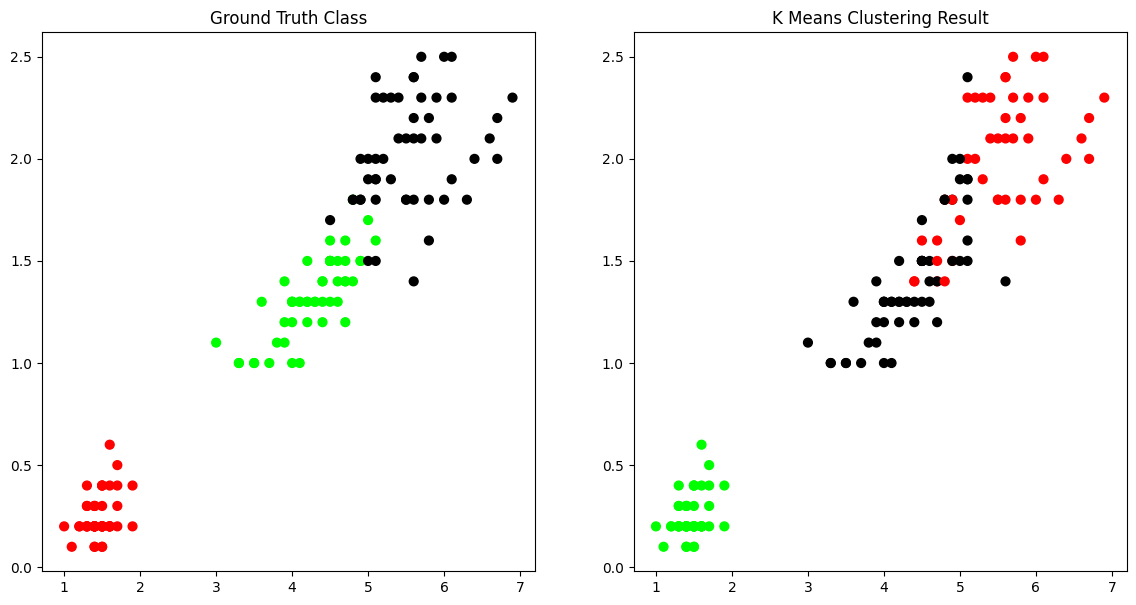

In [10]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Ground Truth Class')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Means Clustering Result')

In [23]:
# The meanings of "0", "1", and "2" in the ground truth label are different from those generated by model. We need to make them consistent.
predY = np.choose(model.labels_, [2, 0, 1]).astype(np.int64)

Text(0.5, 1.0, 'K Mean Clustering Result')

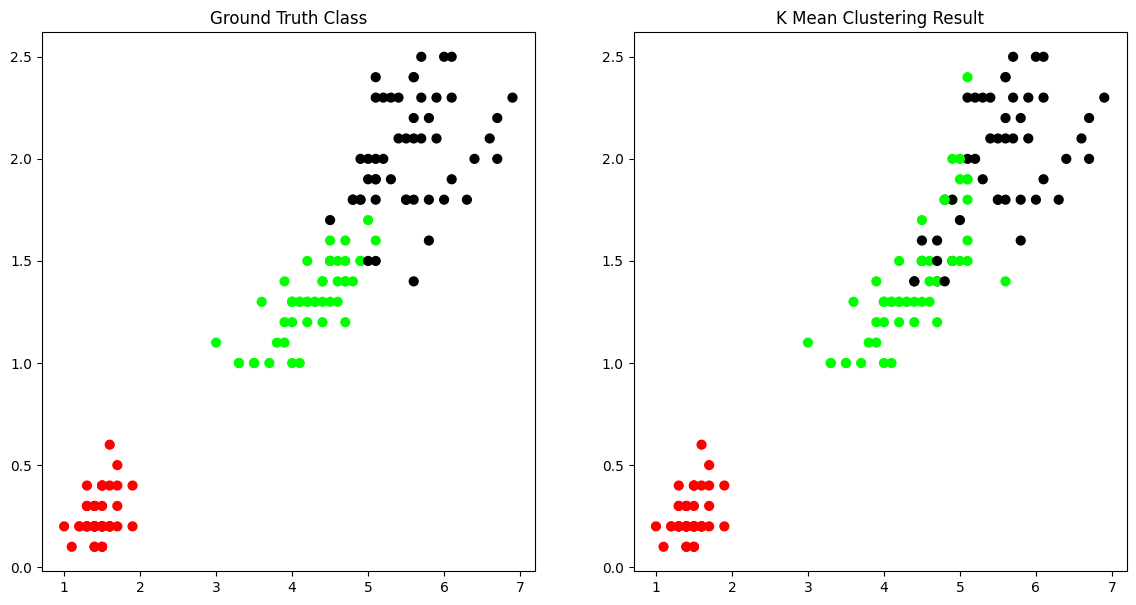

In [24]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Ground Truth Class')

# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Clustering Result')

In [25]:
# Performance Measures
import sklearn.metrics
sklearn.metrics.confusion_matrix(y, predY)

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 14, 36]])

In [26]:
sklearn.metrics.accuracy_score(y, predY)

0.8333333333333334

In [27]:
#Hierarchical Clustering
#apply the complete linkage agglomeration to our clusters using
#the linkage function from SciPy's cluster.hierarchy submodule
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(x.values,method='complete', metric='euclidean')

In [28]:
from scipy.cluster.hierarchy import dendrogram

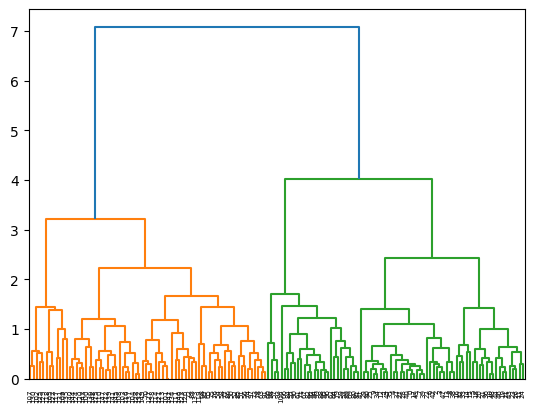

In [29]:
row_dendr = dendrogram(row_clusters)

In [30]:
#Applying agglomerative clustering via scikit-learn
from sklearn.cluster import AgglomerativeClustering

In [31]:
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [32]:
labels = ac.fit_predict(x.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [33]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])